# FINTECH Quant Trading Lecture02

In [1]:
import os
import sys
import warnings
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use( "seaborn" )
matplotlib.rcParams[ 'font.family' ] = 'serif'
warnings.filterwarnings('ignore')
path = os.path.dirname(os.getcwd())
sys.path.append(path)
fig_folder = "QT_Lecture_02"

# ------ 存放数据的文件夹 ------ #
lecturedata_path = os.path.join(path, 'resources', 'lecturedata')
homeworkdata_path = os.path.join(path, 'resources', 'homeworkdata')
if not os.path.exists(lecturedata_path):
    os.mkdir(lecturedata_path)
else:
    pass
if not os.path.exists(homeworkdata_path):
    os.mkdir(homeworkdata_path)
else:
    pass

from common.filesio import FilesIO
from common.figsio import FiguresIO

In [2]:
def parse_input(row_data: pd.DataFrame) -> pd.DataFrame:

    """
    解析股票数据
    """
    
    data = row_data[[
        'Stkcd', 'Trddt', 'Opnprc','Hiprc','Loprc', 
        'Clsprc', 'Dretwd', 'Dnshrtrd', 'Dnvaltrd'
    ]]
    data["Stkcd"] = data["Stkcd"].map(lambda x: '{:06d}'.format(x))
    data.rename(
        columns = {
            'Stkcd':'Code', 'Trddt':'Date', 'Opnprc':'Open',
            'Hiprc':'High', 'Loprc':'Low',
            'Clsprc':'Close', 'Dretwd':'Ret', 
            'Dnshrtrd':'Vol', 'Dnvaltrd':'Amount'
        }, inplace = True 
    )
    data.set_index(['Code', 'Date'], inplace = True)
    data = data.unstack(level = 0)
    data = data.swaplevel(0 , 1, axis = 1)
    data.sort_index( axis = 1, inplace = True )
    return data

In [3]:
res_file = []
for file_name in os.listdir(path=FilesIO.getLectureData("stockdata/daily")):
    if file_name.endswith(".csv"):
        print(
            '"%s"' % (
                FilesIO.getLectureData("stockdata/daily/") + file_name
            ).replace("\\", "/")
        )
        df = pd.read_csv(
            FilesIO.getLectureData("stockdata/daily/") + file_name,
            parse_dates=[1], index_col=None
        )
        res_file.append(df)

resfile = parse_input(pd.concat(res_file))

"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_01.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_02.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr2_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr2_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr3_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_01.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_02.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_04.csv"


In [4]:
resfile.head()

Code              000001                                                    \
                  Amount  Close   High    Low   Open       Ret         Vol   
Date                                                                         
2000-01-04  1.473254e+08  18.29  18.55  17.20  17.50  0.048138   8216086.0   
2000-01-05  1.734752e+08  18.06  18.85  18.00  18.35 -0.012575   9399315.0   
2000-01-06  2.211925e+08  18.78  19.05  17.75  18.02  0.039867  12022209.0   
2000-01-07  4.435924e+08  19.54  19.77  18.90  19.00  0.040469  22934633.0   
2000-01-10  3.722945e+08  20.14  20.48  19.77  19.79  0.030706  18521078.0   

Code              000002                ... 900956                       \
                  Amount  Close   High  ...   Open       Ret        Vol   
Date                                    ...                               
2000-01-04  4.605345e+07  10.30  10.40  ...  0.190  0.000000    58000.0   
2000-01-05  4.734800e+07  10.04  10.45  ...  0.190  0.010526   468000.0   
2000-01-06  7.424435e+07  10.51  10.60  ...  0.190  0.010417   548000.0   
2000-01-07  1.475057e+08  10.99  11.00  ...  0.198  0.072165  1160000.0   
2000-01-10  1.592591e+08  11.44  11.44  ...  0.212 -0.009615   329000.0   

Code       900957                              
           Amount Close High Low Open Ret Vol  
Date                                           
2000-01-04    NaN   NaN  NaN NaN  NaN NaN NaN  
2000-01-05    NaN   NaN  NaN NaN  NaN NaN NaN  
2000-01-06    NaN   NaN  NaN NaN  NaN NaN NaN  
2000-01-07    NaN   NaN  NaN NaN  NaN NaN NaN  
2000-01-10    NaN   NaN  NaN NaN  NaN NaN NaN  

[5 rows x 27909 columns]

# More Technical Indicators

# EWM (Exponential Moving Average)

$EWM(t) = Price(t)×\alpha+EMA(y)×(1-\alpha)$

$t$ : today

$y$ : yesterday

$N$ : span

$alpha$ : $2/(N+1)$

save figure EWM_example...


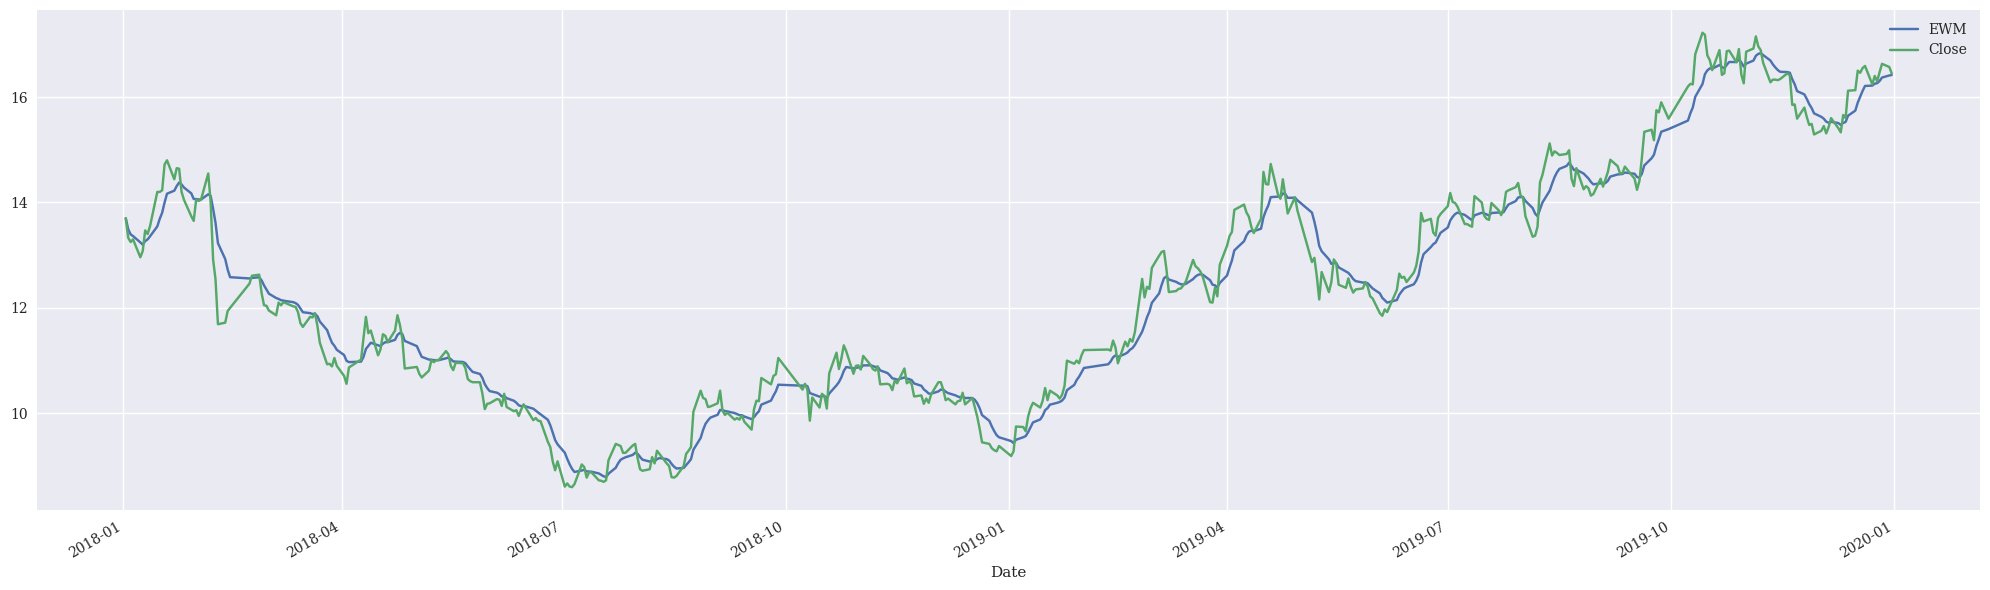

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
resfile["000001"]["2018":]["Close"].ewm(alpha=0.2).mean().plot(ax=ax)
resfile["000001"]["2018":]["Close"].plot(ax=ax)
ax.legend(["EWM", "Close"])
plt.tight_layout()
FiguresIO.saveFigures("EWM_example", fig_folder)
plt.show()

save figure EWM_compare...


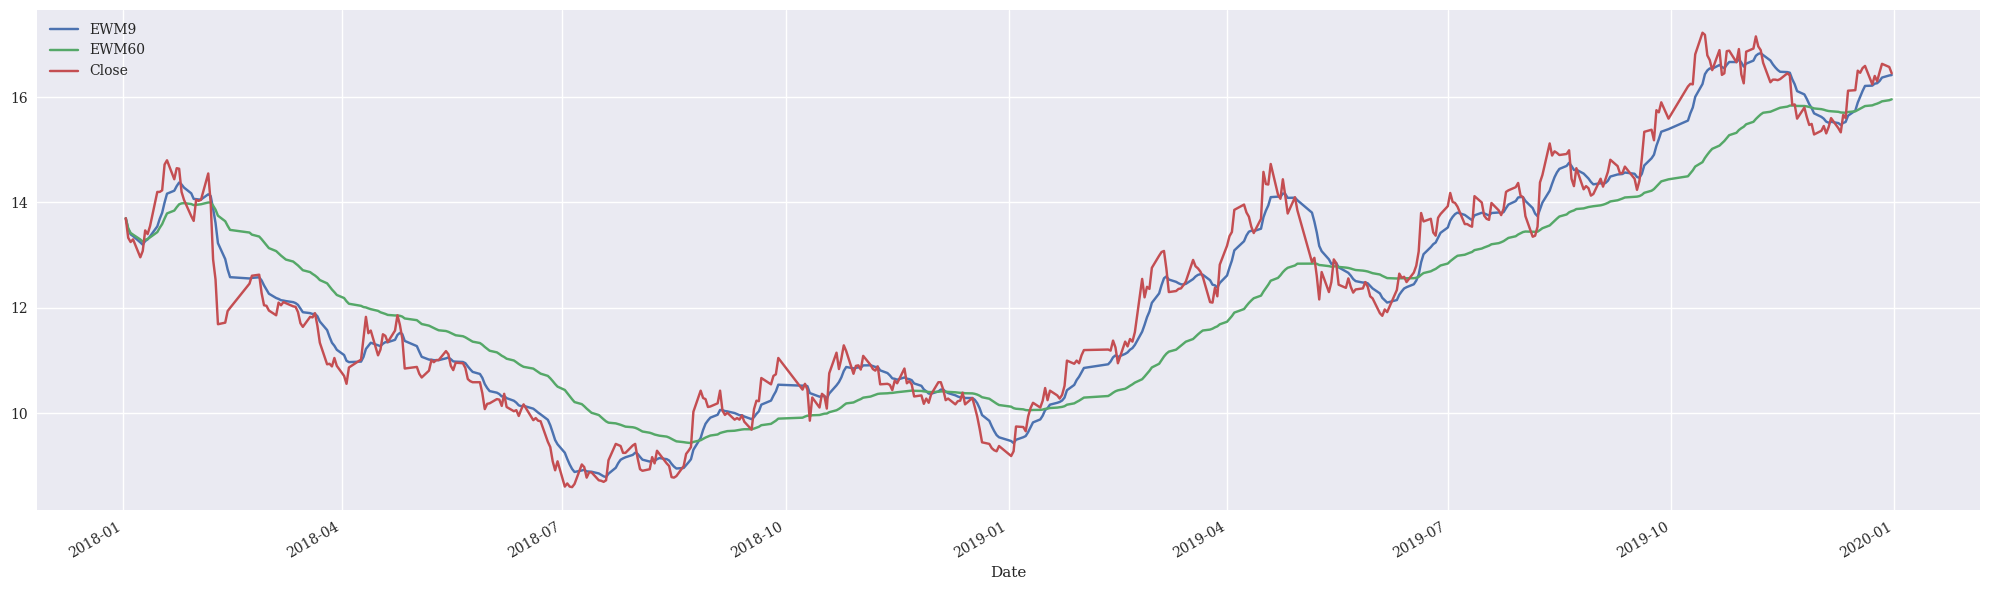

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
resfile["000001"]["2018":]["Close"].ewm(span=9).mean().plot(ax=ax)
resfile["000001"]["2018":]["Close"].ewm(span=60).mean().plot(ax=ax)
resfile["000001"]["2018":]["Close"].plot(ax=ax)
ax.legend(["EWM9", "EWM60", "Close"])
plt.tight_layout()
FiguresIO.saveFigures("EWM_compare", fig_folder)
plt.show()

# MACD

MACD is a trend-following leading indicator that is calculated by subtracting two Exponential Moving Averages (one with longer and the other shorter periods). There are three notable components in a MACD indicator.

### MACD Line: 

This line is the difference between two given Exponential Moving Averages. To calculate the MACD line, one EMA with a longer period known as slow length and another EMA with a shorter period known as fast length is calculated. The most popular length of the fast and slow is 12, 26 respectively. The final MACD line values can be arrived at by subtracting the slow length EMA from the fast length EMA. The formula to calculate the MACD line can be represented as follows:

MACD LINE = FAST LENGTH EMA - SLOW LENGTH EMA

### Signal Line: 

This line is the Exponential Moving Average of the MACD line itself for a given period of time. The most popular period to calculate the Signal line is 9. As we are averaging out the MACD line itself, the Signal line will be smoother than the MACD line.

### Histogram: 

As the name suggests, it is a histogram purposely plotted to reveal the difference between the MACD line and the Signal line. It is a great component to be used to identify trends. The formula to calculate the Histogram can be represented as follows:

HISTOGRAM = MACD LINE - SIGNAL LINE

In [18]:
def get_macd(
       df: pd.DataFrame, slow: int=26, fast: int=12, smooth: int=9
    ) -> pd.DataFrame:
    
    """
    计算MACD相关技术指标
    :param df: 数据DataFrame
    :param slow: 一个指数移动平均，span默认为26
    :param fast: 另一个指数移动平均，span默认为12
    :param smooth: Signal Line指数平均
    """

    # ------ 一个指数移动平均，span默认为26 ------ #
    exp1 = df['Close'].ewm(span=fast).mean()
    # ------ 另一个指数移动平均，span默认为12 ------ #
    exp2 = df['Close'].ewm(span=slow).mean()
    # ------ MACD ------ #
    macd = pd.DataFrame(exp1 - exp2).rename(columns={'Close': 'macd'})
    # ------ Signal Line ------ #
    signal = pd.DataFrame(macd.ewm(span=smooth).mean()).rename(columns={'macd': 'signal'})
    # ------ Historgram ------ #
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns={0: 'hist'})
    frames = [macd, signal, hist]
    df = pd.concat(frames, join='inner', axis=1)
    return df

In [25]:
from matplotlib.figure import Figure
def plot_macd(
        prices: pd.Series, macd: pd.Series, signal: pd.Series, hist: pd.Series
    ) -> Figure:

    """
    可视化MACD
    """

    ax = plt.figure(figsize=(20, 6))
    ax1 = plt.subplot2grid((8, 1), (0, 0), rowspan=5, colspan=1)
    ax2 = plt.subplot2grid((8, 1), (5, 0), rowspan=3, colspan=1)

    ax1.plot(prices)
    ax2.plot(macd, color="grey", linewidth=1.5, label="MACD")
    ax2.plot(signal, color="skyblue", linewidth=1.5, label="SIGNAL")

    ax2.bar(hist[hist < 0].index, hist[hist < 0], color="#ef5350")
    ax2.bar(hist[hist > 0].index, hist[hist > 0], color="#26a69a")
    ax2.legend(loc="lower left")
    return ax

save figure MACD...


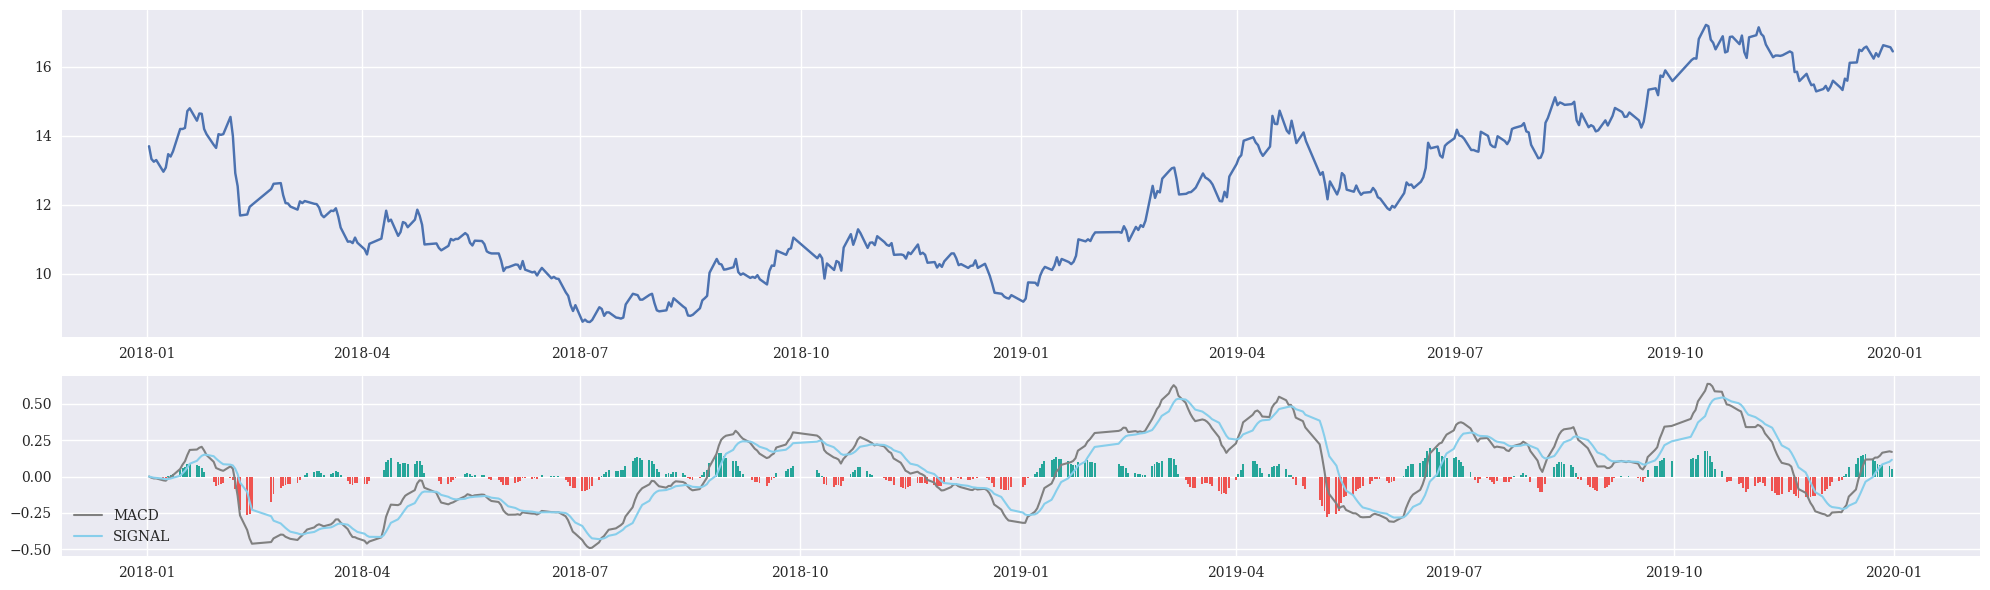

In [26]:
pingan = resfile["000001"]["2018":]
pingan_macd = get_macd(pingan)
ax = plot_macd(
    pingan["Close"], pingan_macd["macd"], pingan_macd["signal"], pingan_macd["hist"]
)
plt.tight_layout()
FiguresIO.saveFigures("MACD", fig_folder)
plt.show()

## Signals

### 1. Crossovers

The MACD line and signal line can be utilised in much the same manner as a stochastic oscillator, with the crossover between the two lines providing buy and sell signals. As with most crossover strategies, a buy signal comes when the shorter-term, more reactive line – in this case the MACD line – crosses above the slower line – the signal line. Conversely, when the MACD line crosses below the signal line it provides a bearish sell signal.

### 2. Histogram reversals

The histogram is arguably the most useful part of MACD, with the bars representing the difference between the MACD and signal lines. When the market price is moving strongly in a direction, the histogram will increase in height, and when the histogram shrinks, it is a sign the market is moving slower. This means that as the bars on the histogram move further away from zero, the two moving average lines are moving further apart. Once the initial expansion phase is over, a hump shape will likely emerge – this is a signal that the moving averages are tightening again, which can be an early sign that a crossover is impending.

### 3.Zero crosses


The zero cross strategy is based on either of the EMAs crossing the zero line. If the MACD crosses the zero line from below, a new uptrend may be emerging, while the MACD crossing from above is a signal that a new downtrend may be starting.





# RSI (Relative Strength Index)

RSI is a momentum indicator, that uses the magnitude of price changes, to evaluate if a security is overbought or oversold.
If the RSI value is over 70, the security is considered overbought, if the value is lower than 30, it is considered to be oversold. Overbought refers that the bubble created from the buying might pop soon, and therefore the price will drop. This creates a strong entry point.


1. Observe the last 14 closing prices of a stock.
2. Determine whether the current day’s closing price is higher or lower than the previous day.
3. Calculate the average gain and loss over the last 14 days.
4. Compute the relative strength (RS): (AvgGain/AvgLoss)
5. Compute the relative strength index (RSI): (100–100 / ( 1 + RS))

## Signals 

### 1. RSI Levels
If the RSI is less than 30, it means that the market is oversold, and that the price might eventually increase. Once the reversal is confirmed, a buy trade can be placed. Conversely, if the RSI is more than 70, it means that it's overbought, and that the price might soon decline. After a confirmation of the reversal, a sell trade can be placed. The 50 level is the midline that separates the upper (Bullish) and lower (Bearish) territories. In an uptrend, the RSI is usually above 50, while in a downtrend, it is below 50.

### 2. Two Period Divergence
Apply a short 5 period RSI (RSI 5) over the longer (default) 14 period RSI (RSI 14) and watch for crossovers. With the RSI 14, there are times when the market does not reach the oversold or overbought levels before a shifting direction occurs. A shorter period RSI is more reactive to recent price changes, so it can show early signs of reversals. When the RSI 5 crosses above the RSI 14, it means that recent prices are getting higher.

In [28]:
from typing import Literal
def RSI(
        df: pd.DataFrame, window_length: int=14, 
        method: Literal["SMA", "EWMA"] = "SMA" 
    ) -> pd.Series:

    """
    计算RSI
    :param df: 数据DataFrame
    :param window_length: 窗口期长度，默认为14
    :param method: 移动平均方法
    """

    delta = df["Close"].diff().dropna()

    # 分别计算收益大于0和收益小于0的部分
    up, down = delta.clip(lower=0), delta.clip(upper=0)
    
    if method == "EWMA":
    # 计算指数移动平均
        roll_up = up.ewm(span=window_length).mean()
        roll_down = down.abs().ewm(span=window_length).mean()
    elif method == "SMA": 
    # 计算普通移动平均
        roll_up = up.rolling(window_length).mean()
        roll_down = down.abs().rolling(window_length).mean()
    else:
        raise ValueError(f"Unknown method: {method}")

    # 计算RSI
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

save figure RSI...


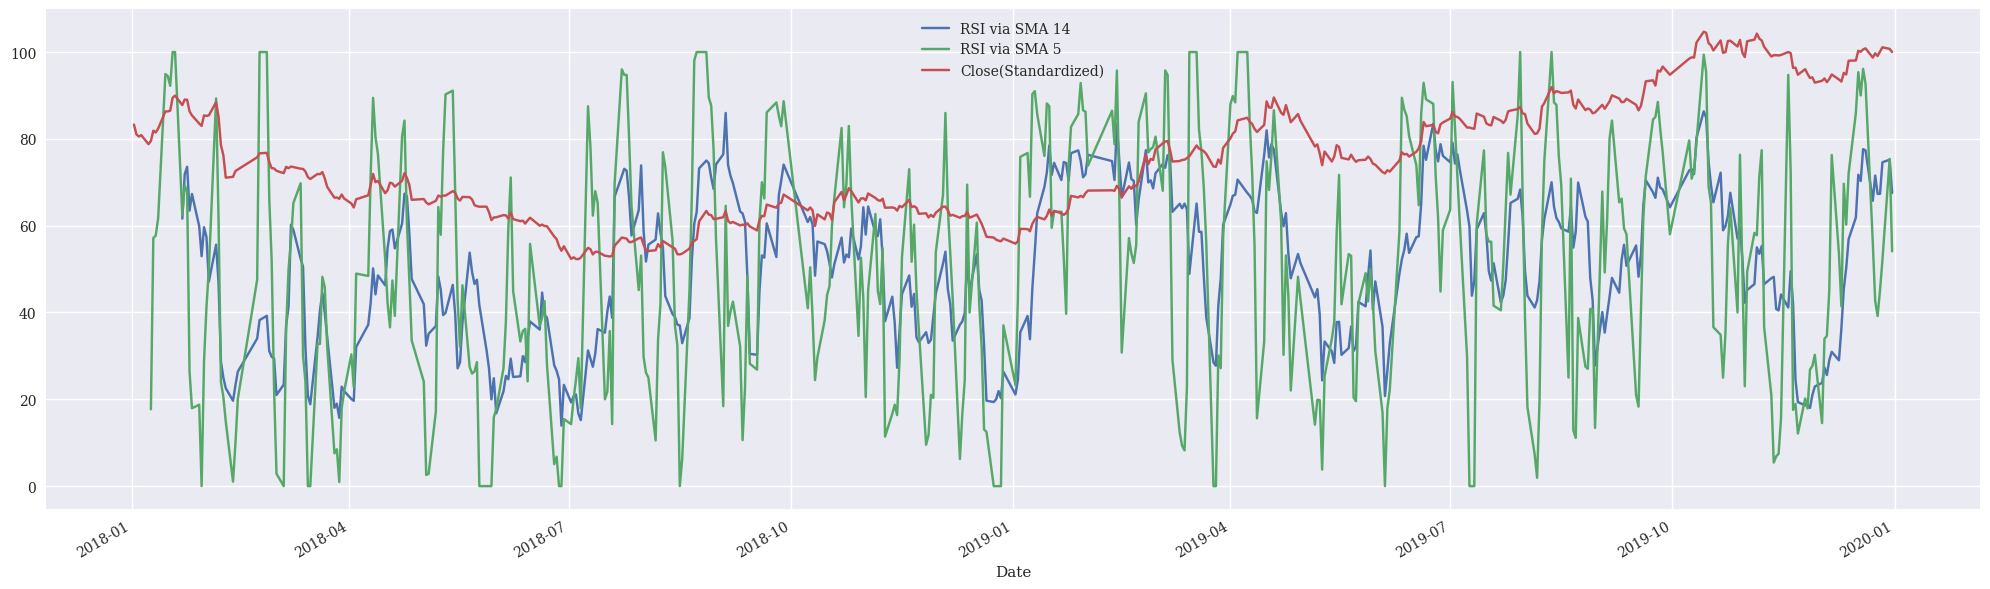

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
RSI(resfile['000001']['2018':], 14, method = 'SMA').plot(ax=ax)
RSI(resfile['000001']['2018':], 5, method = 'SMA').plot(ax=ax)
(
    resfile['000001']['2018':]["Close"]/resfile['000001']['2018':]["Close"][-1]*100
).plot()
plt.legend(['RSI via SMA 14','RSI via SMA 5','Close(Standardized)'])
plt.tight_layout()
FiguresIO.saveFigures("RSI", fig_folder)
plt.show()

# KDJ

The KDJ indicator is also called the stochastic indicator, which was first proposed by Dr. George Lane (George Lane). This indicator contains the strengths of the strength and weakness indicators, the concept of momentum and the advantages of moving averages, and can be used to measure the degree of deviation of the stock price from the normal price range.

#### The first step: 
The RSV value in the calculation period (n days, n weeks, etc., n is generally 9). RSV is also called the immature stochastic index value, which is the basis for calculating the K value, D value and J value. Taking the calculation unit of n-day cycle as an example, the calculation formula is as follows.

RSV for n days = (Cn－Ln)/(Hn－Ln)× 100

####  The second step:
Calculate K and D values ​​according to RSV, the method is as follows.

K value of the day = 2/3 × K value of the previous day + 1/3 × RSV value of the day

D value of the day = 2/3 × D value of the previous day + 1/3 × K value of the day

#### Third step:
Calculate the J value. The calculation formula of J index is: J = 3×K-2×D. From the point of view of use, the essence of J is to reflect the degree of deviation between the K value and the D value. Its range can exceed 100 at the top and below 0 at the bottom.

## Signals
　　1. Golden fork of KDJ indicator

　　When the indicator line K crosses the indicator line D from bottom to top, a golden fork of the KDJ indicator appears and a buyer signal is issued.

　　If the golden fork occurs in the oversold area below 20, the buying signal will be even stronger.

　　2. Dead fork of KDJ indicator

　　When the indicator line K crosses the indicator line D from top to bottom, a KDJ indicator dead fork is formed and a sell signal is issued.

　　 If the dead fork appears in the overbought area above 80, then the sell signal will be even stronger.

When the K value in the KDJ is greater than 80 or is near the signal of overbought status, we should pay special attention to it. If there is unknown factor, the shareholder should immediately throw it out. Because of unknown circumstances, we can't judge the next trend, we don't risk making money outside of our ability. But not all K values greater than 80 can not hold shares, the key is that we should analyze the situation, we can also combine other indicators such as moving averages, MACD.
    
When the K value in KDJ is less than 20 or near, it is a signal of oversold. But don't think it is safe to buy at this time.

In [37]:
def KDJ(df: pd.DataFrame, window_size: int=9) -> pd.DataFrame:

    """
    计算KDJ
    """
    
    res = pd.DataFrame( index = df.index )
    low_list = df["Low"].rolling(window_size, min_periods=1).min()
    high_list = df["High"].rolling(window_size, min_periods=1).max()
    
    rsv = (df["Close"] - low_list) / (high_list - low_list) * 100
    
    res["K"] = rsv.ewm(com=2, adjust=False).mean()
    res["D"] = res["K"].ewm(com=2, adjust=False).mean()
    res["J"] = 3 * res["K"] - 2 * res["D"]    
    
    return res

save figure KDJ...


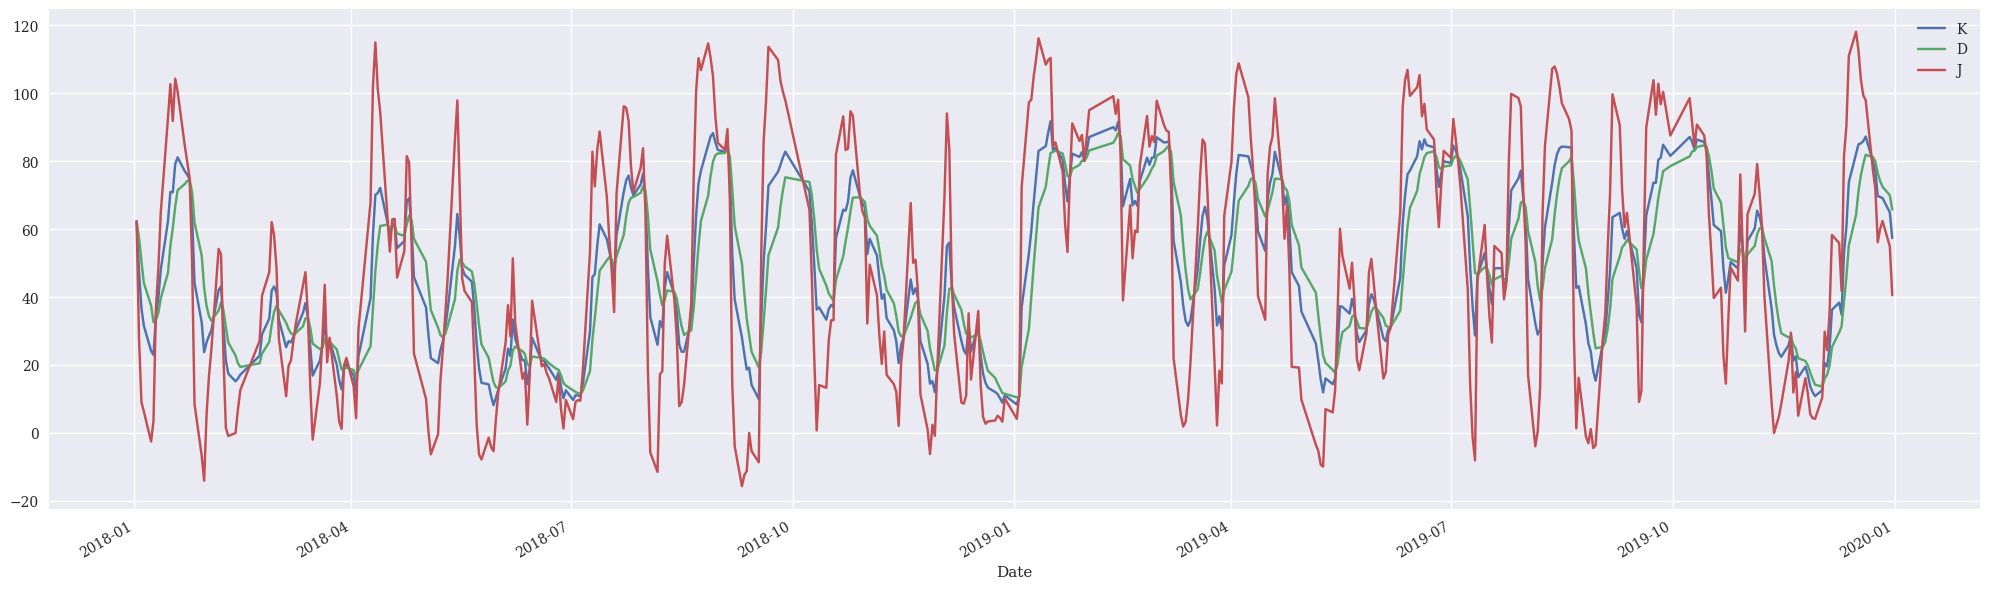

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
KDJ(resfile["000001"]["2018":], 9).plot(ax=ax)
plt.tight_layout()
FiguresIO.saveFigures("KDJ", fig_folder)
plt.show()

## OBV (On-Balance Volume)

\begin{equation}
  OBV = OBV_{previous} +
    \begin{cases}
      Volume & \text{if }close > close_{previous}\\
      0 & \text{if }close = close_{previous}\\
      -Volume & \text{if }close < close_{previous}
    \end{cases}       
\end{equation}

OBV is a technical trading momentum indicator that uses volume flow to predict changes in stock price.

1. When both price and OVE are making higher peaks and higher troughs, the upward trend is likely to continue.

2. When price continues to make lower troughs and and OBV fails to make lower troughs, the downwards trend is likely to stall or fail. This is called a positive divergence.

3. During a trading range, if the OBV is rising, accumulation may be taking place - a warning of an upward breakout.

4. During a trading range, if the OBV is falling, distribution may be taking place - a warning of an downward breakout.

5. When a price continues to make higher peaks and the OBV fails to make higher peaks, the the upward trend is likely to stall or fail. This is called a negative divergence.

## Signals 

### Possible Strategy #1

Traders that use OBV are interested in the rate of change of OBV to generate trade ideas. If the OBV is moving in the upward direction, it could give credence to the idea that a big move upward could be coming in price and vice versa if the OBV is moving in a downward direction, it could give credence to the idea that a big move downward could be coming in price.
For example if the OBV moves down faster than the corresponding move in price, then this could tell a trader that an even bigger move down in price is coming.

### Possible Strategy #2:

We will determine when to buy and sell stock by adding a moving average on the OBV, we’ll trade on crossover signals. This is the strategy that will be programmed in this article.

If OBV starts trading above the exponential moving average (EMA) then we will buy the stock.

If OBV starts trading below the exponential moving average (EMA) then we will sell the stock.

In [ ]:
def OBV( df ):
    return (np.sign(df['Close'].diff()) * \
           df['Vol']/1000000).fillna(0).cumsum()
    